In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [233]:
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100)

In [234]:
df = pd.read_csv('listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

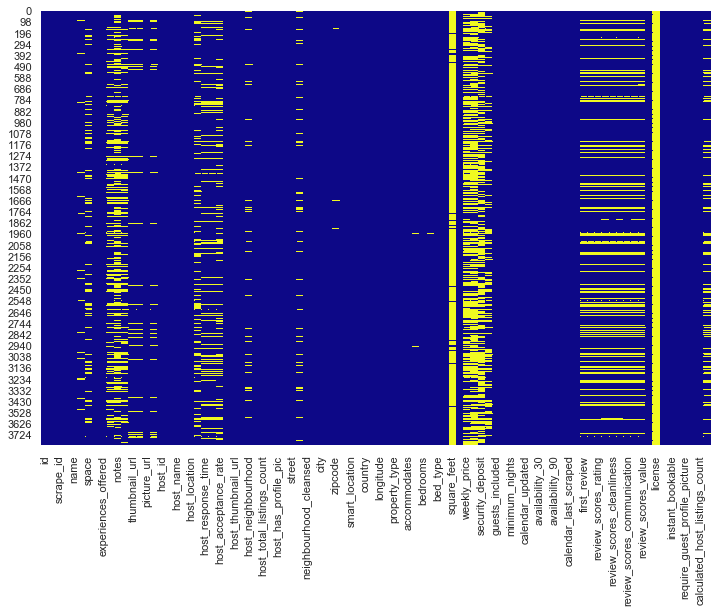

In [235]:
#visualizing the null values:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(df.isnull(), cbar=False, cmap='plasma')


In [236]:
df.price = df.price.str.extract('(\d+)') #extracting out the int value of the price column

In [237]:
df.price = df.price.astype(int)

In [238]:
df.price.describe()

count    3818.00000
mean      127.71451
std        89.16278
min         1.00000
25%        75.00000
50%       100.00000
75%       150.00000
max       999.00000
Name: price, dtype: float64

In [239]:
abs(df.corr().price.sort_values()).sort_values(ascending=False) #start off by checking the correlations to price

price                             1.000000
accommodates                      0.659205
bedrooms                          0.633074
beds                              0.596038
square_feet                       0.531752
bathrooms                         0.524024
guests_included                   0.399172
reviews_per_month                 0.217938
number_of_reviews                 0.124564
longitude                         0.105669
host_total_listings_count         0.095740
host_listings_count               0.095740
review_scores_location            0.085292
availability_90                   0.061674
calculated_host_listings_count    0.053782
review_scores_rating              0.053440
review_scores_cleanliness         0.053186
availability_60                   0.051973
host_id                           0.048908
id                                0.046135
review_scores_value               0.044998
availability_30                   0.039610
availability_365                  0.018361
minimum_nig

#### I will do a heatmap of the correlations to see how they look

In [240]:
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")

This dataset has 3818 rows and 92 columns


In [241]:
#I will filter the columns that I find relevant for my analysis (square_feet has way too many NaNs):
cols = ['price', 'accommodates', 'host_is_superhost', 'host_total_listings_count', 
        'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 
        'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 
        'availability_90', 'number_of_reviews', 'review_scores_rating', 'instant_bookable', 
        'guests_included']
len(cols)

19

In [242]:
df = df[cols] #setting the new dataframe to just the selected columns

In [243]:
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")

This dataset has 3818 rows and 19 columns


In [244]:
#I'm only interested in listings where the renter gets the entire place for themselves
df = df[df.room_type == 'Entire home/apt']

In [245]:
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")

This dataset has 2541 rows and 19 columns


#### Let's take a look at missing values

In [246]:
df.isna().sum() #we have a fairly high number of NaNs in the review_scores_rating column

price                             0
accommodates                      0
host_is_superhost                 2
host_total_listings_count         2
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
property_type                     1
room_type                         0
bathrooms                         9
bedrooms                          6
beds                              0
minimum_nights                    0
maximum_nights                    0
availability_90                   0
number_of_reviews                 0
review_scores_rating            416
instant_bookable                  0
guests_included                   0
dtype: int64

#### I decided to fill these NaNs with the mean review score of the neighbourhood they are located at

In [247]:
neigh_group_means = df.groupby('neighbourhood_group_cleansed').review_scores_rating.mean().to_dict()
neigh_group_means #these numbers need to be reformatted to 1 decimal

{'Ballard': 95.64285714285714,
 'Beacon Hill': 92.68,
 'Capitol Hill': 94.24451410658307,
 'Cascade': 93.55319148936171,
 'Central Area': 96.14948453608247,
 'Delridge': 95.43243243243244,
 'Downtown': 93.86104218362283,
 'Interbay': 93.0,
 'Lake City': 96.28571428571429,
 'Magnolia': 94.3125,
 'Northgate': 94.82352941176471,
 'Other neighborhoods': 94.92118226600985,
 'Queen Anne': 95.38020833333333,
 'Rainier Valley': 93.31746031746032,
 'Seward Park': 94.43478260869566,
 'University District': 86.39682539682539,
 'West Seattle': 95.68571428571428}

In [248]:
for k, v in neigh_group_means.items():
    neigh_group_means[k] = round(neigh_group_means[k], 1)

In [249]:
neigh_group_means

{'Ballard': 95.6,
 'Beacon Hill': 92.7,
 'Capitol Hill': 94.2,
 'Cascade': 93.6,
 'Central Area': 96.1,
 'Delridge': 95.4,
 'Downtown': 93.9,
 'Interbay': 93.0,
 'Lake City': 96.3,
 'Magnolia': 94.3,
 'Northgate': 94.8,
 'Other neighborhoods': 94.9,
 'Queen Anne': 95.4,
 'Rainier Valley': 93.3,
 'Seward Park': 94.4,
 'University District': 86.4,
 'West Seattle': 95.7}

In [250]:
df[df.review_scores_rating.isna()][['review_scores_rating', 'neighbourhood_group_cleansed']].head()

,review_scores_rating,neighbourhood_group_cleansed
3,NaN,Queen Anne
26,NaN,Queen Anne
46,NaN,Queen Anne
51,NaN,Queen Anne
54,NaN,Queen Anne


In [251]:
df.review_scores_rating = df.review_scores_rating.fillna(df.neighbourhood_group_cleansed.map(neigh_group_means))

In [252]:
#no more missing values. my method could certainly be improved by facotoring in more variables for the imputation
df.review_scores_rating.isna().any() 

False

In [253]:
df.isna().sum()

price                           0
accommodates                    0
host_is_superhost               2
host_total_listings_count       2
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   1
room_type                       0
bathrooms                       9
bedrooms                        6
beds                            0
minimum_nights                  0
maximum_nights                  0
availability_90                 0
number_of_reviews               0
review_scores_rating            0
instant_bookable                0
guests_included                 0
dtype: int64

In [254]:
mean_price = df.price.mean() #this variable could be used later
median_price = df.price.median()

In [255]:
df.price.describe

<bound method NDFrame.describe of 0        85
1       150
2       975
3       100
4       450
       ... 
3813    359
3814     79
3815     93
3816     99
3817     87
Name: price, Length: 2541, dtype: int32>

In [256]:
df.groupby('neighbourhood_group_cleansed').size().sort_values()

neighbourhood_group_cleansed
Interbay                 5
Seward Park             27
Lake City               31
Delridge                41
Northgate               41
Magnolia                41
Beacon Hill             57
Cascade                 62
University District     74
Rainier Valley          76
West Seattle           135
Ballard                148
Central Area           225
Queen Anne             231
Capitol Hill           384
Downtown               471
Other neighborhoods    492
dtype: int64

#### Let's try to visualize the neighbourhoods:

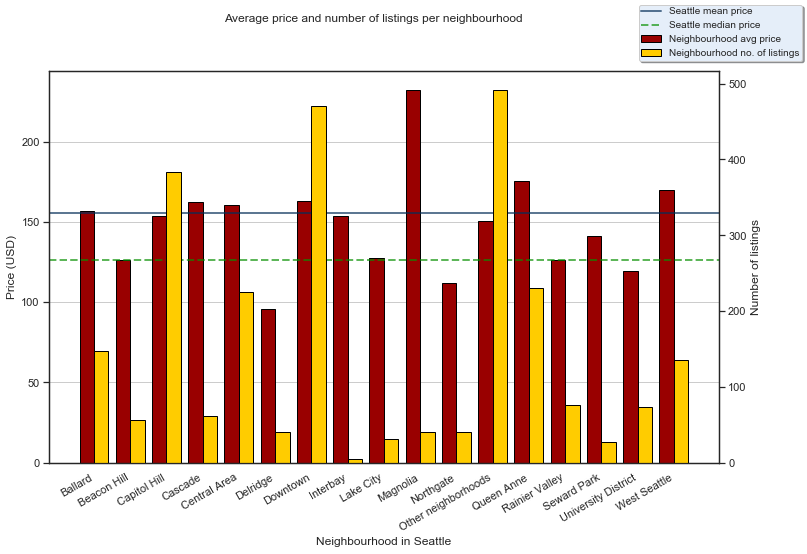

In [257]:
labels = df.groupby('neighbourhood_group_cleansed').price.mean().index
y = df.groupby('neighbourhood_group_cleansed').price.mean().values
z = df.groupby('neighbourhood_group_cleansed').size()
x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Average price and number of listings per neighbourhood')


# ax.bar(x, y, edgecolor='#e1fd00')
ax2 = ax.twinx()
# ax2.plot(x, z, c='red')

rects1 = ax.bar(x - width/2, y, width, color='#990000', edgecolor='black', label='Neighbourhood avg price')
rects2 = ax2.bar(x + width/2, z, width, color='#ffcc00', edgecolor='black', label='Neighbourhood no. of listings')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xticks

ax.set_ylabel('Price (USD)')
ax2.set_ylabel('Number of listings')
ax.set_xlabel('Neighbourhood in Seattle')

ax.axhline(mean_price, c='#052f58', label='Seattle mean price', linestyle='solid', linewidth=2, alpha=0.65)
ax.axhline(median_price, c='#069000', label='Seattle median price', linestyle='dashed', linewidth=2, alpha=0.65)

ax.grid(axis='y')
fig.legend(loc='upper right', frameon=True, borderpad=0.25, fontsize='medium', facecolor='#e5eef9', fancybox=True, shadow=True)



fig.autofmt_xdate()
# ax.xaxis.set_tick_params(rotation=90)
# plt.tight_layout()
plt.savefig('part1.png')

#### Let's look at question number 2, on how to find the cheapest price per bed

In [258]:
df['price_per_bed'] = df.price / df.beds #creating a columne for price per bed

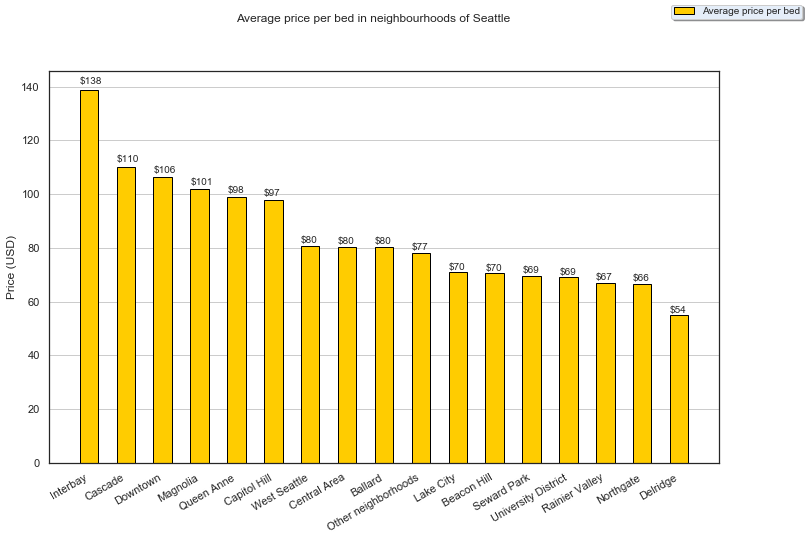

In [259]:
x = df.groupby('neighbourhood_group_cleansed').price_per_bed.mean().sort_values(ascending=False).index
y = df.groupby('neighbourhood_group_cleansed').price_per_bed.mean().sort_values(ascending=False).values

fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Average price per bed in neighbourhoods of Seattle')


ax.bar(x, y, color='#ffcc00', edgecolor='black', width=0.5, label='Average price per bed')
ax.set_ylabel('Price (USD)')
# ax.set_xlabel('Neighbourhood in Seattle')

ax.grid(axis='y')
fig.legend(frameon=True, borderpad=0.25, fontsize='medium', facecolor='#e5eef9', fancybox=True, shadow=True)

for p in ax.patches:
    ax.annotate('$'+str(int(p.get_height())), (p.get_x() * 1.0, p.get_height() * 1.015))

fig.autofmt_xdate()
# plt.tight_layout()
plt.savefig('part2.png')

#### Time for some machine learning predictions

In [261]:
dfml = df.copy()

In [262]:
dfml.drop(columns=['price_per_bed'], inplace=True)

In [263]:
dfml.dtypes

price                             int32
accommodates                      int64
host_is_superhost                object
host_total_listings_count       float64
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
bathrooms                       float64
bedrooms                        float64
beds                            float64
minimum_nights                    int64
maximum_nights                    int64
availability_90                   int64
number_of_reviews                 int64
review_scores_rating            float64
instant_bookable                 object
guests_included                   int64
dtype: object

#### Let's see what the numerical varibles have as correlations

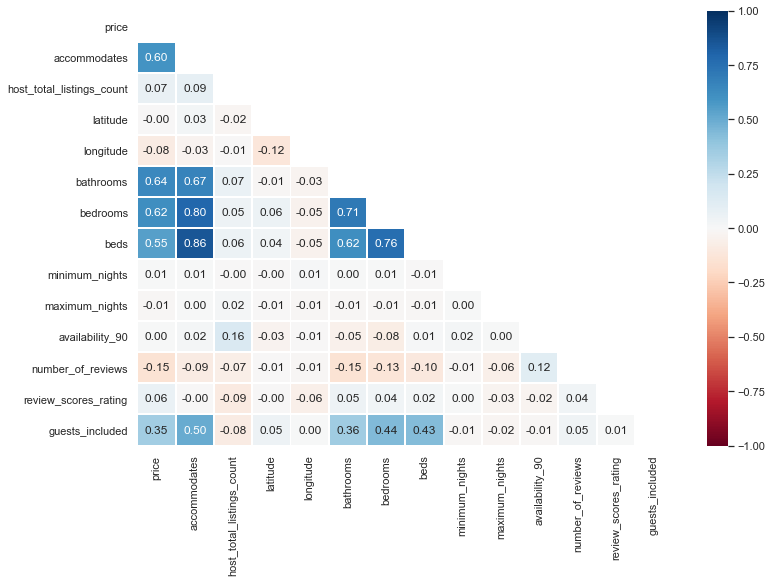

In [264]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12,8))

mask = np.triu(dfml.corr())
sns.heatmap(dfml.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='RdBu', linewidths=1, linecolor='white', mask=mask)
plt.savefig('part3heat.png')

In [265]:
dfml.host_is_superhost = pd.get_dummies(dfml['host_is_superhost'], drop_first=True, dtype=int)

In [266]:
dfml.property_type.value_counts()

Apartment          1428
House               894
Condominium          72
Townhouse            54
Loft                 30
Cabin                16
Bungalow             12
Other                12
Camper/RV             9
Boat                  4
Tent                  3
Bed & Breakfast       3
Treehouse             1
Chalet                1
Yurt                  1
Name: property_type, dtype: int64

In [267]:
dfml.shape

(2541, 19)

In [268]:
#I will turn these into two variables; Apartment+Condominium and House+Townhouse
#and remove the rest

In [269]:
dfml.property_type = dfml.property_type.str.replace('Townhouse', 'House')

In [270]:
dfml.property_type = dfml.property_type.str.replace('Condominium', 'Apartment')

In [271]:
dfml = dfml[dfml.property_type.isin(['House', 'Apartment'])]

In [272]:
dfml.property_type.value_counts()

Apartment    1500
House         948
Name: property_type, dtype: int64

In [273]:
dfml.property_type = pd.get_dummies(dfml['property_type'], drop_first=True, dtype=int)

In [274]:
dfml = dfml.rename(columns={'property_type': 'property_is_house'})


In [275]:
dfml.instant_bookable

0       f
1       f
2       f
3       f
4       f
       ..
3813    f
3814    f
3815    f
3816    f
3817    f
Name: instant_bookable, Length: 2448, dtype: object

In [276]:
dfml.drop(columns=['room_type'], inplace=True)

In [277]:
dfml.instant_bookable = pd.get_dummies(dfml['instant_bookable'], drop_first=True, dtype=int)

In [278]:
dfml.dtypes #everything done except the most tricky one, the neighbourhoods

price                             int32
accommodates                      int64
host_is_superhost                 int32
host_total_listings_count       float64
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_is_house                 int32
bathrooms                       float64
bedrooms                        float64
beds                            float64
minimum_nights                    int64
maximum_nights                    int64
availability_90                   int64
number_of_reviews                 int64
review_scores_rating            float64
instant_bookable                  int32
guests_included                   int64
dtype: object

In [279]:
dfml = dfml.dropna()

In [280]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [281]:
dummy = pd.get_dummies(dfml['neighbourhood_group_cleansed'], prefix='neigh_')


In [282]:
dfml = dfml.join(dummy)

In [283]:
dfml.drop(columns=['neighbourhood_group_cleansed'], inplace=True)

In [284]:
#Split into explanatory and response variables
X = dfml.drop(columns=['price'])
y = dfml['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model was {} on {} values (using Linear Regression)".format(round(r2_score(y_test, y_test_preds), 4), len(y_test))

'The r-squared score for the model was 0.5179 on 730 values (using Linear Regression)'

In [285]:
import xgboost as xgb


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 	
# fit model no training data
xgb_reg = xgb.XGBRegressor(silent=True)
xgb_reg.fit(X_train, y_train)


#evaluate predictions
y_test_preds = xgb_reg.predict(X_test)
"The r-squared score for the model was {} on {} values (using XGBoost)".format(round(r2_score(y_test, y_test_preds), 4), len(y_test))

'The r-squared score for the model was 0.5521 on 730 values (using XGBoost)'

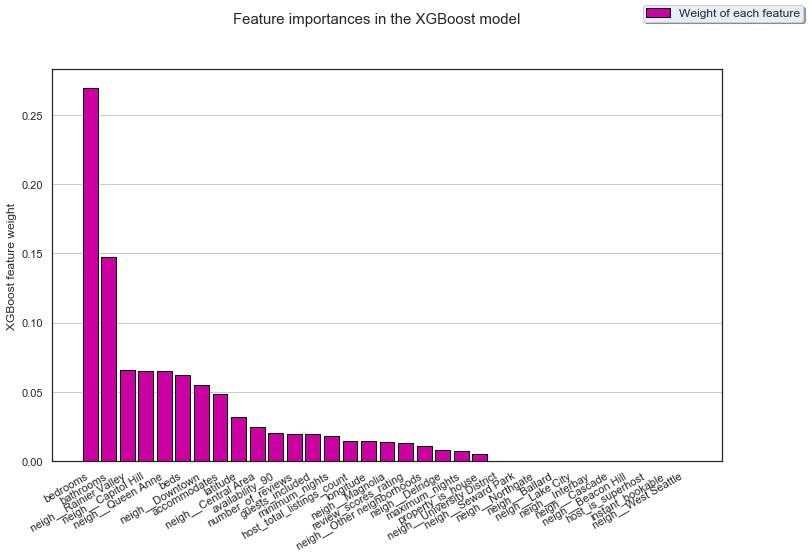

In [289]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True, ascending=False)

# Plotting feature importances
fig, ax = plt.subplots(figsize=(12,8))

fig.suptitle("Feature importances in the XGBoost model", fontsize=15)

ax.bar(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, color='#ca00a3', edgecolor='black', label='Weight of each feature') 
ax.set_ylabel('XGBoost feature weight')
ax.grid(axis='y')


fig.legend(frameon=True, borderpad=0.25, fontsize='medium', facecolor='#e5eef9', fancybox=True, shadow=True)

# plt.margins(y=0.01)
fig.autofmt_xdate()
# plt.tight_layout()
plt.savefig('part3xgb')